**Problem 3.1** What kind of mapping from input to output would be created if the activation function in equation $3.1$ was linear so that $a[z] = ψ_0 + ψ_1 z$? What kind of mapping would be created if the activation function was removed, so $a[z] = z$?

Recall equation $3.1$:
$$y = f[x, \phi]$$
$$ = \phi_0 + \phi_1 a[\theta_{10} + \theta_{11} x] + \phi_2 a[\theta_{20} + \theta_{21} x] + \phi_3 a[\theta_{30} + \theta_{31} x] .\tag{3.1}$$

If $a[z] = z$:

$$y = \phi_0 + \phi_1 \left( \psi_{10} + \psi_{11} \left(\theta_{10} + \theta_{11} x \right) \right) + 
  \phi_2 \left(\psi_{20} + \psi_{21} \left(\theta_{20} + \theta_{21} x \right) \right) + 
  \phi_3 \left(\psi_{30} + \psi_{31} \left(\theta_{30} + \theta_{31} x \right) \right)$$

Rearranging the terms in the equation:

$$ = {\color{green}\left(\phi_1 \psi_{11} \theta_{11} + \phi_2 \psi_{21} \theta_{21} + \phi_3 \psi_{31} \theta_{31}\right)} x
   + {\color{blue}\left(\phi_0 + \phi_1 \psi_{10} + \phi_2 \psi_{20} + \phi_3 \psi_{30}
   + \phi_1 \psi_{11} \theta_{10} + \phi_2 \psi_{21} \theta_{20} + \phi_3 \psi_{31} \theta_{30} \right)}$$

The terms in green and blue seems mouthful but we really can denote them by $\chi_0$ and $\chi_1$ 

$$ y = {\color{green}\chi_1} x + {\color{blue}\chi_0}$$

In general, setting the activation function to be a linear transformation will make the neural network the same as only one unit of linear regression. So, settings $a[z] = z$ will also yield the same result. The activation function needs to be non-linear to make sure that all units existed in the neural network are being utilized.

Let's prove this by code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define some input
x = np.arange(-2.0, 2.0, 0.01)

# define a linear activation function
def linear(z):
    return z

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# calculate the forward path of the model
y = phi_0 + phi_1 * linear(theta_10 + theta_11 * x) + phi_2 * linear(theta_20 + theta_21 * x) + phi_3 * linear(theta_30 + theta_31 * x)

If you tried to print the output of the model, you will see just a line, which proves our words

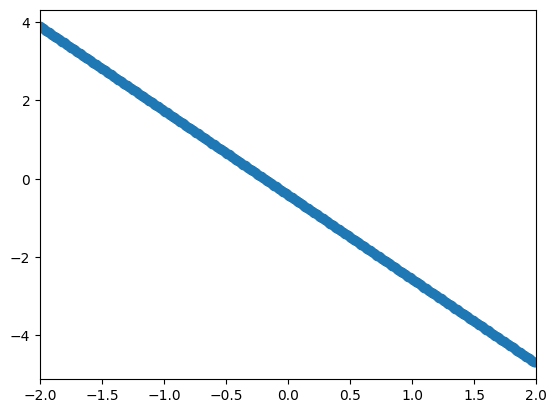

In [2]:
plt.xlim([-2.0, 2.0])
plt.scatter(x, y)
plt.show()

**Problem 3.2** For each of the four linear regions in figure 3.3j, indicate which hidden units are inactive and which are active (i.e., which do and do not clip their inputs).

<center>
  <img src="assets/shallow_neural_network.jpeg" />
</center>

**First Region:**
1) h1: inactive
2) h2: inactive
3) h3: active

**Second Region:**
1) h1: active
2) h2: inactive
3) h3: active

**Third Region:**
1) h1: active
2) h2: active
3) h3: active

**Fourth Region:**
1) h1: active
2) h2: active
3) h3: inactive

**Problem 3.3∗** Derive expressions for the positions of the “joints” in function in figure 3.3j in terms of the ten parameters $\phi$ and the input $x$. Derive expressions for the slopes of the four linear regions.

The positions of the joints in the x-axis are just the corresponding x-intercept of each linear unit

$$y = f[x, \phi]$$
$$ = \phi_0 + \phi_1 a[{\color{red}\theta_{10} + \theta_{11} x}] + \phi_2 a[{\color{green}\theta_{20} + \theta_{21} x}] + \phi_3 a[{\color{blue}\theta_{30} + \theta_{31} x}] .\tag{3.1}$$

So, the positions of joints in the x-axis are $\frac{-\theta_{10}}{\theta_{11}}$, $\frac{-\theta_{20}}{\theta_{21}}$, and $\frac{-\theta_{30}}{\theta_{31}}$

To get the poistions in the y-axis, we just have to substitute with each value of the x-axis in the model's equation

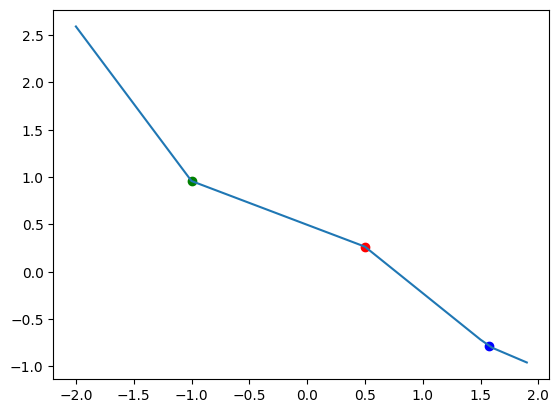

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# define the relu activation function
def relu(z):
    return np.maximum(z, 0)

# define the network equation
def forward(x):
    return phi_0 + phi_1 * relu(theta_10 + theta_11 * x) + phi_2 * relu(theta_20 + theta_21 * x) + phi_3 * relu(theta_30 + theta_31 * x)

# define some input
x = np.arange(-2.0, 2.0, 0.1)

# plot the input/output, along with the joints' positions
plt.plot(x, forward(x))
plt.scatter(-theta_10/theta_11, forward(-theta_10/theta_11), c="r")
plt.scatter(-theta_20/theta_21, forward(-theta_20/theta_21), c="g")
plt.scatter(-theta_30/theta_31, forward(-theta_30/theta_31), c="b")
plt.show()

To calculate the slop of each each linear region, we sum for each region the slops of the lines that are active

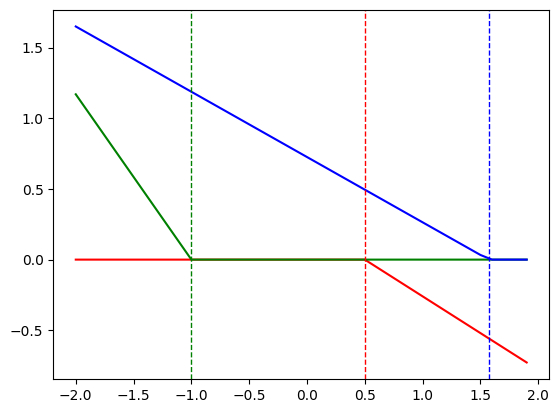

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# define the relu activation function
def relu(z):
    return np.maximum(z, 0)

# define some input
x = np.arange(-2.0, 2.0, 0.1)

# plot the input/output, along with the joints' positions
plt.plot(x, phi_1 * relu(theta_10 + theta_11 * x), c="r")
plt.plot(x, phi_2 * relu(theta_20 + theta_21 * x), c="g")
plt.plot(x, phi_3 * relu(theta_30 + theta_31 * x), c="b")
plt.axvline(-theta_10/theta_11, linestyle="--", linewidth=1, c="r")
plt.axvline(-theta_20/theta_21, linestyle="--", linewidth=1, c="g")
plt.axvline(-theta_30/theta_31, linestyle="--", linewidth=1, c="b")
plt.show()

The slope at each region:
1) $\phi_2 \theta_{21} + \phi_3 \theta_{31}$
2) $\phi_3 \theta_{31}$
3) $\phi_1 \theta_{11} + \phi_3 \theta_{31}$
4) $\phi_1 \theta_{11}$

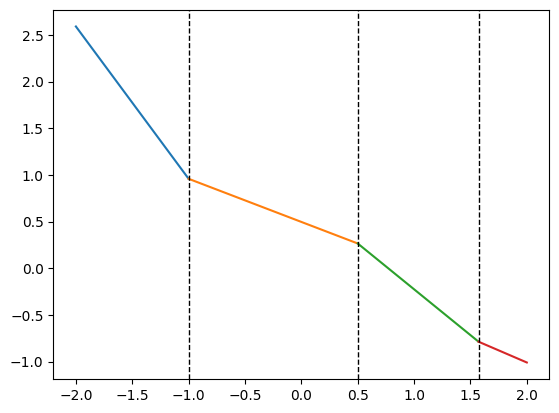

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# define the regions' intervals
first_region   = np.arange(-2.0, -theta_20/theta_21, 0.001)
second_region  = np.arange(-theta_20/theta_21, -theta_10/theta_11, 0.001)
third_region   = np.arange(-theta_10/theta_11, -theta_30/theta_31, 0.001)
fourth_region  = np.arange(-theta_30/theta_31, 2.0, 0.001)

# plot each region       (global_bias)            (the slopes of the active ones)         (the biases of the active ones) 
plt.plot(first_region,   phi_0 + first_region   * (phi_2 * theta_21 + phi_3 * theta_31) + phi_2 * theta_20 + phi_3 * theta_30)
plt.plot(second_region,  phi_0 + second_region  * (phi_3 * theta_31)                    + phi_3 * theta_30)
plt.plot(third_region,   phi_0 + third_region   * (phi_3 * theta_31                     + phi_1 * theta_11) + phi_3 * theta_30 + phi_1 * theta_10)
plt.plot(fourth_region,  phi_0 + fourth_region  * (phi_1 * theta_11)                    + phi_1 * theta_10)

# define the boundries of each region
plt.axvline(-theta_10/theta_11, linestyle="--", linewidth=1, c="black")
plt.axvline(-theta_20/theta_21, linestyle="--", linewidth=1, c="black")
plt.axvline(-theta_30/theta_31, linestyle="--", linewidth=1, c="black")
plt.show()

**Problem 3.5** Prove that the following property holds for $\alpha \in \mathbb{R}^+$:

$$ReLU[\alpha \cdot z] = \alpha \cdot ReLU[z]. \tag{3.14}$$

This is known as the *non-negative homogeneity* property of the $ReLU$ function.

Let's count for the both cases of the $ReLU$ function:

$$
ReLU[\alpha \cdot z] = \begin{cases} 
  0 & \text{if } z \le 0 \\ 
  \alpha \cdot z & \text{if } z > 0 
\end{cases}.
$$

Then, we can say that $ReLU[\alpha \cdot z] = \alpha \cdot ReLU[z]$, such that $\alpha \in \mathbb{R}^+$.

**Problem 3.6** Following on from problem $3.5$, what happens to the shallow network defined in equations $3.3$ and $3.4$ when we multiply the parameters $\theta_{10}$ and $\theta_{11}$ by a positive constant $\alpha$ and divide the slope $\phi_1$ by the same parameter $\alpha$? What happens if $\alpha$ is negative?

If we multiply the parameters $\theta_{10}$ and $\theta_{11}$ by a positive constant $\alpha$ and divide the slope $\phi_1$ by the same parameter $\alpha$, the output should be the same based on what we say on problem $3.5$, as long as $\alpha$ is positive.

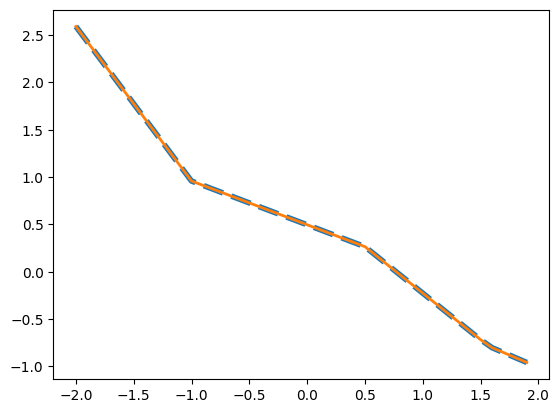

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# define the relu activation function
def relu(z):
    return np.maximum(z, 0)

# define some input
x = np.arange(-2.0, 2.0, 0.1)

# define alpha
alpha = 0.2

# plot the input/output, along with the joints' positions
plt.plot(x, 
         phi_0 + phi_1 * relu(theta_10 + theta_11 * x) + phi_2 * relu(theta_20 + theta_21 * x) + phi_3 * relu(theta_30 + theta_31 * x), 
         linestyle="--",
         linewidth=4)
plt.plot(x, 
         phi_0 + phi_1 / alpha * relu(alpha * (theta_10 + theta_11 * x)) + phi_2 * relu(theta_20 + theta_21 * x) + phi_3 * relu(theta_30 + theta_31 * x),
         linestyle="-",
         linewidth=2)
plt.show()

If $\alpha \le 0$, the output would be changed. Setting $\alpha$ is undefined (divide by zero), and setting it to a negative number will reverse the inactive and active status for the linear unit

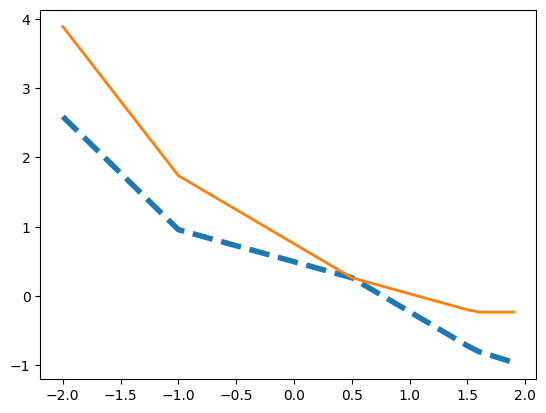

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, -0.9, 1.1, -0.7

# define the relu activation function
def relu(z):
    return np.maximum(z, 0)

# define some input
x = np.arange(-2.0, 2.0, 0.1)

# define alpha
alpha = -1.0

# plot the input/output, along with the joints' positions
plt.plot(x, 
         phi_0 + phi_1 * relu(theta_10 + theta_11 * x) + phi_2 * relu(theta_20 + theta_21 * x) + phi_3 * relu(theta_30 + theta_31 * x), 
         linestyle="--",
         linewidth=4)
plt.plot(x, 
         phi_0 + phi_1 / alpha * relu(alpha * (theta_10 + theta_11 * x)) + phi_2 * relu(theta_20 + theta_21 * x) + phi_3 * relu(theta_30 + theta_31 * x),
         linestyle="-",
         linewidth=2)
plt.show()

**Problem 3.7** Consider fitting the model in equation $3.1$ using a least squares loss function. Does this loss function have a unique minimum? i.e., is there a single “best” set of parameters?

$$y = f[x, \phi]$$
$$ = \phi_0 + \phi_1 a[\theta_{10} + \theta_{11} x] + \phi_2 a[\theta_{20} + \theta_{21} x] + \phi_3 a[\theta_{30} + \theta_{31} x] .\tag{3.1}$$

$$L\left[\phi, \theta \right] = \sum_{i=1}^{I} \left( \phi_0 + \phi_1 a[\theta_{10} + \theta_{11} x_i] + \phi_2 a[\theta_{20} + \theta_{21} x_i] + \phi_3 a[\theta_{30} + \theta_{31} x_i] - y_i\right)^2$$

Suppose that we found a set of parameter that gave the minimum output:
$$\left[\phi_0, \phi_1, \phi_2, \phi_3, \theta_{10}, \theta_{11}, \theta_{20}, \theta_{21}, \theta_{30}, \theta_{31} \right] 
=>\left[b, c, d, e, f, g, i, j, k, l\right]$$
Substituting in our loss function:
$$ = \sum_{i=1}^{I} \left( b + c \cdot a[f + g \cdot x_i] + d \cdot a[i + j \cdot x_i] + e \cdot a[k + l \cdot x_i] - y_i\right)^2$$
If we reset $\theta_{10}$ to $2f$, $\theta_{11}$ to $2g$, and $\phi_1$ to $\frac{c}{2}$:
$$ = \sum_{i=1}^{I} \left( b + \frac{c}{2} \cdot a[2 \cdot f + 2\cdot g \cdot x_i] + d \cdot a[i + j \cdot x_i] + e \cdot a[k + l \cdot x_i] - y_i\right)^2$$
Using the *non-negative homogeneity* property of the $ReLU$:
$$ = \sum_{i=1}^{I} \left( b + c \cdot a[f + g \cdot x_i] + d \cdot a[i + j \cdot x_i] + e \cdot a[k + l \cdot x_i] - y_i\right)^2$$
Which will gave us the same minimum loss.

**Problem 3.8** Consider replacing the ReLU activation function with $(i)$ the *Heaviside* step function $heaviside[z]$, $(ii)$ the *hyperbolic tangent* function $tanh[z]$, and $(iii)$ the *rectangular* function $rect[z]$, where:

$$
Heaviside[z] = \begin{cases} 
  0 & \text{if } z < 0 \\ 
  1 & \text{if } z \ge 0 \\
\end{cases},
$$
$$
rect[z] = \begin{cases}
  0 & \text{if } z < 0 \\
  1 & \text{if } 0 \le z \le 1 \\
  0 & \text{if } z > 1
\end{cases}.
$$

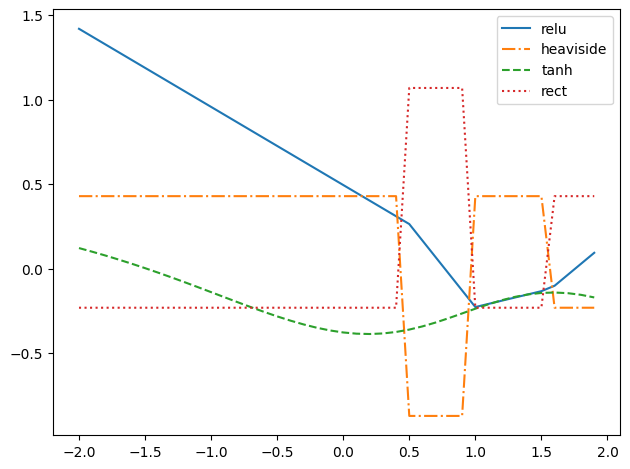

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# define our nn parameters
phi_0, phi_1, phi_2, phi_3 = -0.23, -1.3, 1.3, 0.66
theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = -0.2, 0.4, -0.9, 0.9, 1.1, -0.7

# define activation functions
def relu(z):
    return np.maximum(z, 0)

def heaviside(z):
    return z >= 0

def tanh(z):
    return np.tanh(z)

def rect(z):
    z = z >= 0
    return z < 1

# define the network equation
def forward(x, activation):
    return phi_0 + phi_1 * activation(theta_10 + theta_11 * x) + phi_2 * activation(theta_20 + theta_21 * x) + phi_3 * activation(theta_30 + theta_31 * x)

# define some input
x = np.arange(-2.0, 2.0, 0.1)

# plot the input/output, along with the joints' positions
plt.plot(x, forward(x, relu), label="relu", linestyle="solid")
plt.plot(x, forward(x, heaviside), label="heaviside", linestyle="dashdot")
plt.plot(x, forward(x, tanh), label="tanh", linestyle="dashed")
plt.plot(x, forward(x, rect), label="rect", linestyle="dotted")
plt.legend()
plt.tight_layout()
plt.show()

**Problem 3.9∗** Show that the third linear region in figure $3.3$ has a slope that is the sum of the slopes of the first and fourth linear regions.

The third linear region has the slope $\phi_2 \theta_{21} + \phi_3 \theta_{31}$, which sum of the slopes of the second and third hidden units. On the other side, in the first region: the first and second hidden units are inactives, while the third is active. In the fourth region: the first and third hidden units are inactives, while the second is active. So, the sum of slopes of the first and fourth linear regions is $\phi_2 \theta_{21} + \phi_3 \theta_{31}$.

**Problem 3.10** Consider a neural network with one input, one output, and three hidden units. The construction in figure $3.3$ shows how this creates four linear regions. Under what circumstances could this network produce a function with fewer than four linear regions?

If we have two or more hidden units that are inactives at the same time, we would get fewer than four linear regions.

**Problem 3.11∗** How many parameters does the model in figure $3.6$ have?

<center>
  <img src="assets/network_example_1.jpeg" />
</center>

= the number of edges in the graph + the number of nodes except the input $= 12 + 6 = 18$.

**Problem 3.12** How many parameters does the model in figure $3.7$ have?

<center>
  <img src="assets/network_example_2.jpeg" />
</center>

$= 9 + 4 = 13$.

**Problem 3.13** What is the activation pattern for each of the seven regions in figure $3.8$? In other words, which hidden units are active (pass the input) and which are inactive (clip the input) for each region?

<center>
  <img src="assets/3.8_activation_regions.jpeg" />
</center>

1) unit 1: **active**, unit 2: inactive, unit 3: inactive
2) unit 1: **active**, unit 2: **active**, unit 3: inactive
3) unit 1: **active**, unit 2: **active**, unit 3: **active**
4) unit 1: inactive, unit 2: **active**, unit 3: **active**
5) unit 1: inactive, unit 2: inactive, unit 3: **active**
6) unit 1: inactive, unit 2: inactive, unit 3: inactive
7) unit 1: **active**, unit 2: inactive, unit 3: **active**

**Problem 3.14** Write out the equations that define the network in figure $3.11$. There should be three equations to compute the three hidden units from the inputs and two equations to compute the outputs from the hidden units.

<center>
  <img src="assets/3.11_figure.jpeg" />
</center>

$$h_1 = a[\theta_{10} + \theta_{11} x_1 + \theta_{12} x_2 + \theta_{13} x_3],$$
$$h_2 = a[\theta_{20} + \theta_{21} x_1 + \theta_{22} x_2 + \theta_{23} x_3],$$
$$h_3 = a[\theta_{30} + \theta_{31} x_1 + \theta_{32} x_2 + \theta_{33} x_3],$$
$$y_1 = a[\phi_{10} + \phi_{11} h_1 + \phi_{12} h_2 + \phi_{13} h_3],$$
$$y_2 = a[\phi_{20} + \phi_{21} h_1 + \phi_{22} h_2 + \phi_{23} h_3].$$

**Problem 3.15∗** What is the maximum possible number of $3D$ linear regions that can be created by the network in figure $3.11$?

In the network in figure $3.11$, the number of inputs equal the number of hidden units. So, the maximum possible number of $3D$ linear regions is $3^{D_i} = 3^3 = 27$ linear regions. 

**Problem 3.16** Write out the equations for a network with two inputs, four hidden units, and three outputs. Draw this model in the style of figure $3.11$.

$$h_1 = a[\theta_{10} + \theta_{11} x_1 + \theta_{12} x_2],$$
$$h_2 = a[\theta_{20} + \theta_{21} x_1 + \theta_{22} x_2],$$
$$h_3 = a[\theta_{30} + \theta_{31} x_1 + \theta_{32} x_2],$$
$$h_4 = a[\theta_{40} + \theta_{41} x_1 + \theta_{42} x_2],$$
$$y_1 = a[\phi_{10} + \phi_{11} h_1 + \phi_{12} h_2 + \phi_{13} h_3 + \phi_{14} h_4],$$
$$y_2 = a[\phi_{20} + \phi_{21} h_1 + \phi_{22} h_2 + \phi_{23} h_3 + \phi_{14} h_4],$$
$$y_3 = a[\phi_{30} + \phi_{31} h_1 + \phi_{32} h_2 + \phi_{33} h_3 + \phi_{34} h_4].$$

**Problem 3.17∗** Equations $3.11$ and $3.12$ define a general neural network with $D_i$ inputs, one hidden layer containing $D$ hidden units, and $D_o$ outputs. Find an expression for the number of parameters in the model in terms of $D_i$, $D$, and $D_o$.

$$= D \left(D_i + D_o + 1\right) + D_o.$$

**Problem 3.18∗** Show that the maximum number of regions created by a shallow network with $D_i = 2$-dimensional input, $D_o = 1$-dimensional output, and $D = 3$ hidden units is seven, as in figure $3.8j$. Use the result of Zaslavsky $(1975)$ that the maximum number of regions created by partitioning a $D_i$-dimensional space with $D$ hyperplanes is $\sum_{j=0}^{D_i}\binom{D}{j}$. What is the maximum number of regions if we add two more hidden units to this model, so $D = 5$?

$D_i = 2$, $D = 3$, then:
$$\sum_{j=0}^{D_i}\binom{D}{j} = \sum_{j=0}^{2}\binom{3}{j} = \binom{3}{0} + \binom{3}{1} + \binom{3}{2} = 1 + 3 + 3 = 7,$$
If $D$ is changed to $D = 5$:
$$ = \sum_{j=0}^{2}\binom{5}{j} = \binom{5}{0} + \binom{5}{1} + \binom{5}{2} = 1 + 5 + 10 = 16.$$